<a href="https://colab.research.google.com/github/Steven-Macas/random-forest/blob/main/randomForest_vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de aprendizaje supervisado**

---

## Random Forest

*   El preproceso
*   Entrenamiento y predicción
*   evaluación
*   optimización de hiperparámetros
*   Usando GridSearchCV y/o RandomizedSearchCV

## Librerías

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay

## Cargar Dataset

In [ ]:
data = pd.read_csv('WineQT.csv')

## Preproceso

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


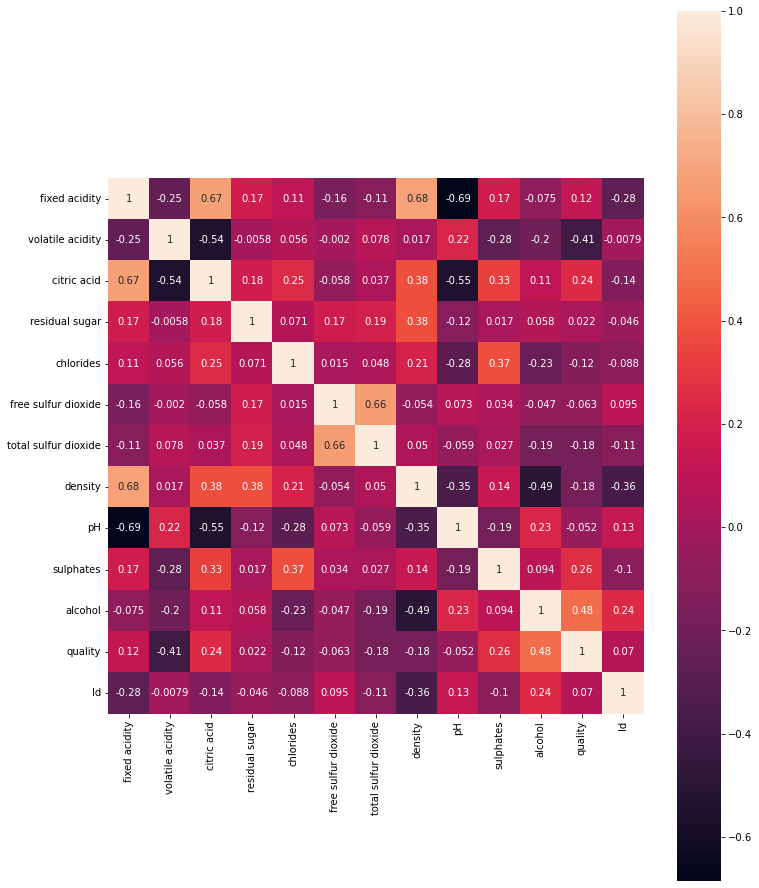

In [ ]:
#Mapa de Calor del DataFrame del Vino
plt.figure(figsize=(12, 16))
map_calor = sns.heatmap(data.corr(),square = True, annot = True)
map_calor

In [ ]:
# Verificar si hay valores nulos
print(data.isnull().any())#True->Null

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Id                      False
dtype: bool


In [ ]:
# Eliminar las columnas que no son relevantes para el análisis
data = data.drop(['Id'], axis=1)

In [ ]:
# Separamos las características de la variable objetivo
x = data.drop(['quality'], axis=1)
y = data['quality']

In [ ]:
#Reseteamos el index con el fin de no evitar problemas en la visualización cruzada
x.reset_index(drop = True, inplace = True)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=42)

## Entrenamiento

In [ ]:
param_dist = {'n_estimators': [100,256,512],
              'max_features':['auto','sqrt'],
              'max_depth':[8,4,2],
              'bootstrap':[True,False]}#Este parámetro es una métrica especial para los bosques
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_dist, cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [8, 4, 2],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 256, 512]})

## Evaluación

In [ ]:
#Realizamos la predicción del conjunto de prueba
predict = grid.predict(x_test)
predict

array([5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 7, 6, 6, 6, 5, 5, 6, 6, 5, 7, 6, 5,
       5, 7, 5, 5, 6, 6, 5, 6, 6, 6, 7, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5,
       5, 5, 5, 6, 5, 6, 7, 5, 5, 6, 6, 7, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6,
       6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7,
       6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       7, 6, 7, 5, 5, 5, 6, 6, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 5, 5, 7, 6, 5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5,
       7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 7, 5, 6, 6, 6, 6, 7, 5, 6, 6, 5, 6,
       7, 6, 6, 6, 5, 6, 7, 7, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 7, 6,
       6, 5, 5, 5, 5, 6, 6, 6, 6])

In [ ]:
#Evaluamos la exactitud del modelo
accuracy = accuracy_score(y_test,predict)
accuracy

0.6724890829694323

## Matriz de confusión

<ipython-input-11-2167cf665c8a>:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


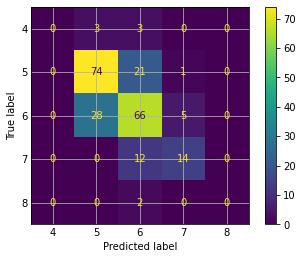

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,predict)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

## Características del modelo

In [ ]:
for i in range(x_train.columns.shape[0]):
  print(x_train.columns[i],":", best_grid.feature_importances_[i])

fixed acidity : 0.062003598855009376
volatile acidity : 0.11226318398222467
citric acid : 0.06894350590297586
residual sugar : 0.0538379300065269
chlorides : 0.06958996396048805
free sulfur dioxide : 0.0552449810239495
total sulfur dioxide : 0.1053644655834283
density : 0.08281488027695927
pH : 0.05927047448236601
sulphates : 0.13940685622037835
alcohol : 0.1912601597056937


## AdaBoost

In [ ]:
#Mostramos los mejores Hiperparámetros que se obtiene al usar GridSearchCV y lo guardamos
print(grid.best_estimator_)
best_grid = grid.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=8, max_features='sqrt',
                       n_estimators=512)


In [ ]:
#Actualizamos el modelo utilizando AdaBoost y los hiperparámetros obtneidos en el modelo de bosques creado
param = {
    'algorithm':['SAMME','SAMME.R'],
    'n_estimators':[100],
    'random_state': [1],
    'learning_rate': [0.6],
}
model_best = AdaBoostClassifier(base_estimator=best_grid)
gridSCV = GridSearchCV(model_best,param)

In [ ]:
gridSCV.fit(x_train,y_train)
best_gridSCV = gridSCV.best_estimator_

In [ ]:
#Mostramos los mejores Hiperparámetros obtenidos
best_gridSCV

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=False,
                                                         max_depth=8,
                                                         max_features='sqrt',
                                                         n_estimators=512),
                   learning_rate=0.6, n_estimators=100, random_state=1)

In [ ]:
#Obtenemos la importancia de cada característica en el modelo actualizado
for i in range(x_train.columns.shape[0]):
  print(x_train.columns[i],":", best_gridSCV.feature_importances_[i])

fixed acidity : 0.0754208491740118
volatile acidity : 0.1160996834018643
citric acid : 0.09301198427786339
residual sugar : 0.05386542946415292
chlorides : 0.08932583585680433
free sulfur dioxide : 0.07374718848503987
total sulfur dioxide : 0.10526248403206208
density : 0.08377166170931309
pH : 0.08070106757791447
sulphates : 0.1081951227174878
alcohol : 0.12059869330348562


In [ ]:
y_predict = best_gridSCV.predict(x_test)

In [ ]:
#Evaluamos la exactitud del modelo actualizado
accuracy = accuracy_score(y_test, y_predict)
print("Exactitud del modelo actualizado:", accuracy)

Exactitud del modelo actualizado: 0.6550218340611353


<ipython-input-19-788bc1b61c6f>:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


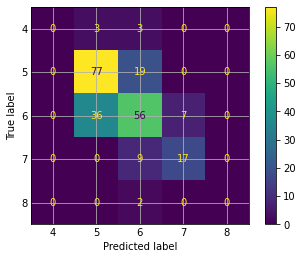

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)